# Video Games Sales Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("vgsales.csv")

In [3]:
df.shape

(16324, 11)

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [5]:
df.info

<bound method DataFrame.info of         Rank                                               Name Platform  \
0        259                                          Asteroids     2600   
1        545                                    Missile Command     2600   
2       1768                                            Kaboom!     2600   
3       1971                                           Defender     2600   
4       2671                                             Boxing     2600   
...      ...                                                ...      ...   
16319  16565                                       Mighty No. 9     XOne   
16320  16572                                 Resident Evil 4 HD     XOne   
16321  16573                      Farming 2017 - The Simulation      PS4   
16322  16579                                  Rugby Challenge 3     XOne   
16323  16592  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV   

       Year       Genre             Publisher  NA_Sales

In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16324.000000,16324.000000,16324.000000,16324.000000,16324.000000,16324.000000,16324.000000
mean,8291.508270,2006.404251,0.265464,0.147581,0.078673,0.048334,0.540328
std,4792.043734,5.826744,0.821658,0.508809,0.311584,0.189902,1.565860
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4135.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8293.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df['Genre'].value_counts()

Action          3252
Sports          2304
Misc            1710
Role-Playing    1469
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64

array([[<AxesSubplot:title={'center':'Rank'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'NA_Sales'}>],
       [<AxesSubplot:title={'center':'EU_Sales'}>,
        <AxesSubplot:title={'center':'JP_Sales'}>,
        <AxesSubplot:title={'center':'Other_Sales'}>],
       [<AxesSubplot:title={'center':'Global_Sales'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

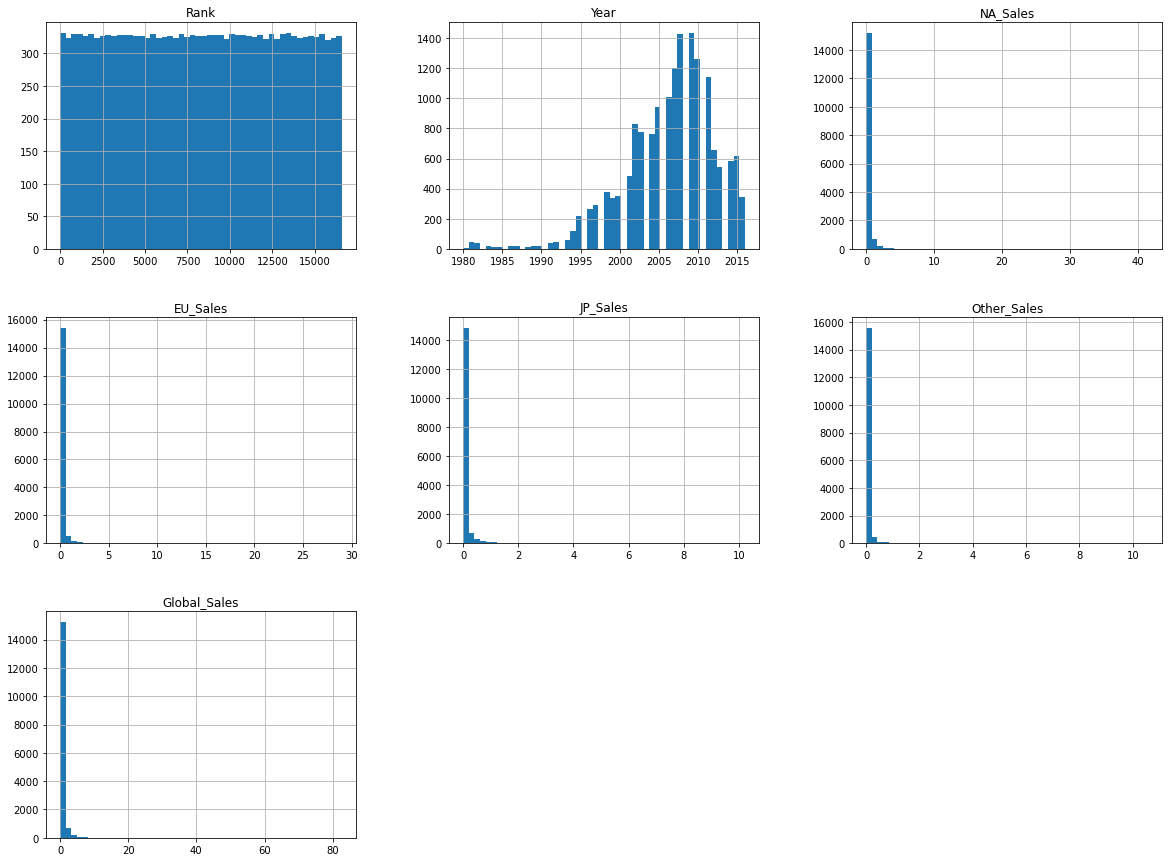

In [8]:
df.hist(bins=50, figsize=(20,15))

In [9]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [10]:
data = df.dropna()

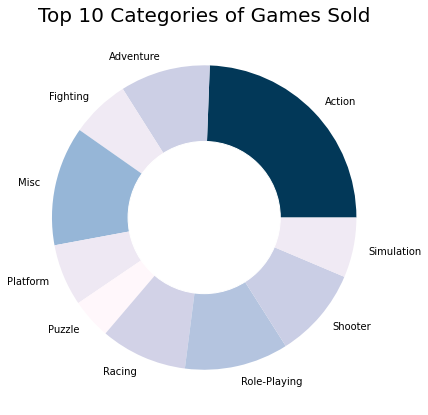

In [11]:
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

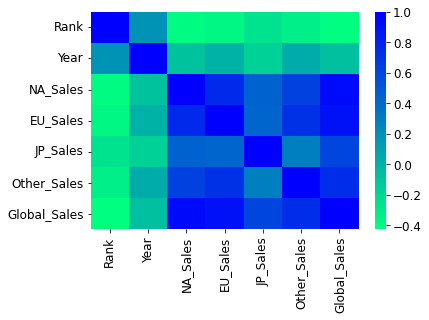

In [12]:
data.corr()
sns.heatmap(data.corr(), cmap="winter_r")
plt.show()

In [13]:
x = data[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(xtrain, ytrain)
model.predict(xtest)

array([0.0705823 , 1.66975138, 2.29967932, ..., 1.48979017, 0.06059278,
       1.32974684])

In [15]:
predictions = model.predict(xtest)
#print(predictions,list(ytest))

In [16]:
from sklearn.metrics import mean_squared_error
final_mse=mean_squared_error(ytest,predictions)
final_rmse=np.sqrt(final_mse)

In [17]:
final_rmse

0.005286007278506805

In [18]:
#print(model.score(xtest,ytest))